In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 100
std = 0.4
#ایجاد لیستی 500 تایی از اعداد به عنوان طول عرض 
Apple_width = np.random.normal(6, std , N)
Apple_length = np.random.normal(6, std , N)

Benanas_width = np.random.normal(4, std, N)
Benanas_length = np.random.normal(8, std, N)

In [3]:
#قرار   طول هادر یک لیست در کنار هم و الحاق عرض ها و وزن ها 
width = np.concatenate((Apple_width, Benanas_width))
length = np.concatenate((Apple_length, Benanas_length))

In [11]:
# ایجاد یک آرایه دو بعدی که سطر های 1000 است و ستون های عرض و طول و وزن 3 است. ما به عنوان 
#ویژگی که میخواهیم روی آن ها "کا"ر کنیم
# ایجاد 500 عدد صفر و 500عدد یک برای انتصاب به لیبل بالن هاو خربزه ها
X = np.array([width, length]).T #تعویض جای سطر و ستون ها
Apple_lable = np.zeros(N, dtype = 'int') 
Benanas_lable = np.ones(N, dtype = 'int')
X

array([[5.58149209, 6.13687253],
       [6.29448636, 5.53263568],
       [5.49310389, 6.224233  ],
       [5.71307122, 5.95789168],
       [6.23249422, 5.73710651],
       [6.22545022, 5.91963834],
       [5.78837554, 6.17890682],
       [6.13989264, 6.65411358],
       [6.27236032, 6.02592506],
       [6.15271421, 6.453061  ],
       [6.22686438, 6.4350834 ],
       [6.39124394, 6.65061023],
       [6.62945302, 5.62910557],
       [5.72177751, 6.14945787],
       [6.05795779, 6.20949379],
       [5.87756623, 5.74519075],
       [6.01750965, 6.59154858],
       [6.77319983, 5.87507293],
       [6.29325334, 6.09693275],
       [6.42462571, 6.11164511],
       [5.87521358, 6.26287029],
       [6.37090428, 6.63009823],
       [6.52923619, 5.97885554],
       [5.95857338, 5.46047842],
       [5.66597505, 4.79307739],
       [6.87740761, 7.06016186],
       [5.66399764, 5.44575682],
       [6.24100268, 5.80503734],
       [6.4122357 , 5.86357265],
       [5.70391739, 7.024235  ],
       [6.

In [10]:
#به هم پیوستن لیبل بالن ها و خربزه ها برای ایجاد خروجی یا تارگت
Y = np.concatenate((Apple_lable,Benanas_lable))
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Text(0, 0.5, 'Length')

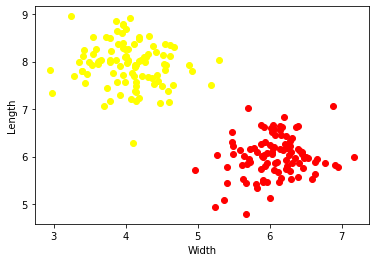

In [6]:
fig = plt.figure()
plt.scatter(X[0:N , 0] , X[0:N , 1] ,  c = 'RED')
plt.scatter(X[N: ,0] , X[N: ,1]  , c = 'yellow')
plt.xlabel('Width')
plt.ylabel('Length')

In [7]:
class kNearestNeighbors(): #چون الگوریتم ساده ای هست فاز ترین هم در آن ساده است
    def __init__(self, k):# زمانی الگوریتم میخواد اجرا بشه تنها چیزی میپرسه ک است
        self.k = k # یک ک به عنوان پارامتر براش میفرستیم
        # در این الگوریتم به این گونه است که موقعیت هر ایتم را بدوانیم(مثلا سیب ها کجا هستند ) تا بتوانی با ورود میوه جدید با یافتن فاصله محسبات و پیش بینی انجام دهیم 
        # تابعی که عملیات ترین رو انجام میده معمولا به نام ""فیت" می شناسیم. یک سری داده را روی یک مدل فیت کنیم یعنی ان ها ترین شدندdef fit(self, X_train , Y_train): #( ترین میشه دانستن داده های ورودی)میوه هایی که از اول تولید کردیم و موجود هستند
    
    def fit(self, X_train , Y_train): 
        self.X_train = X_train
        self.Y_train = Y_train
        #الگوریتم حق داره تعداد دسته ها را بداند و کلاس هایی که توسط آن ها پیش بینی انجام شود باید مشخص گردد__ در تارگت ما دو عدد منحصر به فرد وجود دارد صفر و یک پس دوتا کلاس داریم
        self.number_classes = len(np.unique(Y_train))

            # اول باید همسایه هارو پیدا کنی تا بعد بریم سراغ همسایه های نزدیک
    def nearNeighbors(self , X_test):
        #از فاصله اقلیدوسی برای یافتن فاصله میوه جدید با 200 تا تمام میوه قبلی استفاده میکنیم 
        #فاصله با تمام میوه ها که حساب شد سورت میکنیم و "کا" تا نزدیک تر رو بر میداریم
        # تابع جمع در اینجا در نهایت یک عدد رو جزر میگیره و یک عدد به ما میده که به درد ما نخواهد خورد ما به اندازه تمام دیتای ترین شده فاصله نیاز داریم پس باشد اکسیس = 1 را قرار دهیم
        dist = np.sqrt(np.sum((X_test - self.X_train) ** 2 , axis = 1))
        #فاصله ها را سورت میکنه و "کا" تا اول را بر میداردو اسمش را میگزاریم همسایه های نزدیک    
        #وقتی بر اساس فاصله صورت میکنیم و در متغییر میریزیم فاصله هارو داریم
        # ما نیاز به فاصله ها نداریم ما نیاز به مشخص شن نوع میوه داریم پس از "آرگ سورت" استفاده میکنیم تا اندیس را داشته باشیم
        # بعد ازینکه اندیس "کا" میوه نزدیک را در بین تمام میوه ها بدست آوریم 
        near_neighbors = np.argsort(dist)[:self.k]
        print(near_neighbors)
        print(self.Y_train[near_neighbors])
        # حال باید ببینیم از میوه اهی مشخص شده کدوام تکرار بیشتری دارد
        # با تایع "بین "کا"نت" می توانیم تعداد رخ داد های در آرایه را ببینیم یا بهتر بگیم تعداد تکرار مقادری هر خانه آرائه را نمایش می دهد
        print(np.bincount(self.Y_train[near_neighbors]))
        # چک میکنیم اندیس  بیشترین عدد تکرار شده را نشان بده تا بفهمیم 0 یا 1 بیشتر تکرار شده
        return near_neighbors

            
        # این تابع یک داده از ما میگیرد و برچسبش رو ترین میکنه و موقع جواب دادن رسیده. پس تنها پارامتری که میگیره ویژگی یا ایکس هست و خودش باید پیش بینی انجام دهد
        # کی‌ان‌ان میگه "کا" همسایه های نزدیک رو پیدا کن و ببین به کدوم آیتم شبیه تر است
    def predict (self, X_test):
        near_neighbors = self.nearNeighbors(X_test)
        #به همسایه های نزدیک تابع قبل نگاه میکند و پردیکت انجام میدهد 
        y = np.argmax(np.bincount(self.Y_train[near_neighbors]))
        return y

In [8]:
knn = kNearestNeighbors (k = 5)
knn.fit(X,Y)

In [9]:
new_fruit = np.array([4.7 , 6.8])
y_pred = knn.predict(new_fruit)
friut = { 0 : 'موز' , 
          1: 'سیب'}
print(friut[y_pred])

[195 172 156 120 132]
[1 1 1 1 1]
[0 5]
سیب
